In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


#### Import dat o návštěvnosti CHKO

In [3]:
cn = pd.read_csv("CHKO_navstevnost.csv", parse_dates=['datum'], encoding="utf-8") 
cn

,id,datum,nazev_citace,navstevnost,lat,lon
0,4,2016-01-01,Sv Kopeček Křížová cesta,404,48.806598,16.646356
1,4,2016-01-01,Sv Kopeček Křížová cesta IN,222,48.804932,16.641053
2,4,2016-01-01,Sv Kopeček Křížová cesta OUT,182,48.811250,16.654684
3,4,2016-01-01,Ploučnice,0,50.676251,14.594609
4,4,2016-01-01,Děvín,78,48.869422,16.650086
...,...,...,...,...,...,...
12958,1430,2020-06-30,Děvín IN,124,48.852773,16.643088
12959,1430,2020-06-30,Sv Kopeček Křížová cesta OUT,459,48.811250,16.654684
12960,1430,2020-06-30,Sv Kopeček Křížová cesta IN,387,48.804932,16.641053
12961,1430,2020-06-30,Sv Kopeček Křížová cesta,846,48.806598,16.646356


#### Import dat o počasí 2016-2020

In [4]:
pocasi = pd.read_csv("pocasi_2016-2020.csv", parse_dates=['datum'], encoding="utf-8")

#### Import tabulky ke spojení dat o návštěvnosti a o počasí

In [5]:
bridge = pd.read_csv("meteo_stanice_bridge.csv", encoding="utf-8")

#### Spojení dat o návštěvnosti s propojovací tabulkou

In [6]:
spojeni = pd.merge(cn, bridge, on="nazev_citace")

#### Spojení dat o návštěvnosti s počasím

In [7]:
dataset = pd.merge(spojeni, pocasi, how="inner", on=['datum', 'id_stanice'])
dataset

,id,datum,nazev_citace,navstevnost,lat,lon,nazev_stanice,id_stanice,max_teplota,srazky,naraz_vetru
0,4,2016-01-01,Sv Kopeček Křížová cesta,404,48.806598,16.646356,Němčičky,nemcicky,-1.3,0.9,NaN
1,4,2016-01-01,Sv Kopeček Křížová cesta IN,222,48.804932,16.641053,Němčičky,nemcicky,-1.3,0.9,NaN
2,4,2016-01-01,Sv Kopeček Křížová cesta OUT,182,48.811250,16.654684,Němčičky,nemcicky,-1.3,0.9,NaN
3,4,2016-01-01,Děvín,78,48.869422,16.650086,Němčičky,nemcicky,-1.3,0.9,NaN
4,4,2016-01-01,Děvín IN,11,48.852773,16.643088,Němčičky,nemcicky,-1.3,0.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12378,153,2020-06-26,Radobýl,162,50.530378,14.093285,Žitenice,zitenice,24.1,0.0,NaN
12379,657,2020-06-27,Radobýl,165,50.530378,14.093285,Žitenice,zitenice,29.0,0.4,42.0
12380,913,2020-06-28,Radobýl,134,50.530378,14.093285,Žitenice,zitenice,27.6,0.2,NaN
12381,425,2020-06-29,Radobýl,86,50.530378,14.093285,Žitenice,zitenice,23.2,4.2,NaN


#### Pokus vykreslení regrese na jednom sčítači - data o návštěvnosti a počasí u sčítače Děvín za 6 měsíců v 2020

In [8]:
scitac = dataset[dataset['nazev_citace']=="Děvín"]
scitac_2020 = scitac[scitac['datum'] >= '2020-01-01']

In [9]:
y = scitac_2020.iloc[:, 3].values 
X = scitac_2020.iloc[:, 8].values
X = X.reshape(-1, 1)

In [10]:
model = LinearRegression().fit(X, y)

In [15]:
r_sq = model.score(X, y)
print('Koeficient determinace:', round(r_sq, 3))

Koeficient determinace: 0.003


In [12]:
y_pred = model.predict(X)

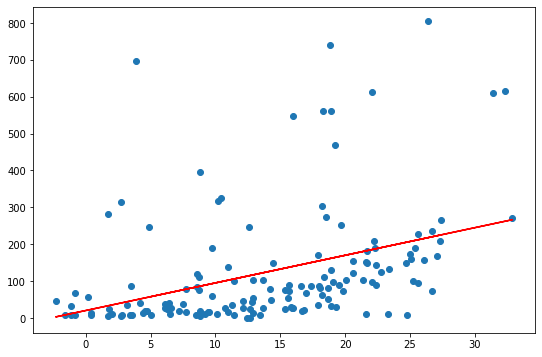

In [13]:
plt.figure(figsize=(9, 6))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

### Zobrazení regresí u všech sčítačů CHKO za první pololetí 2020

Koeficient determinace: 0.19


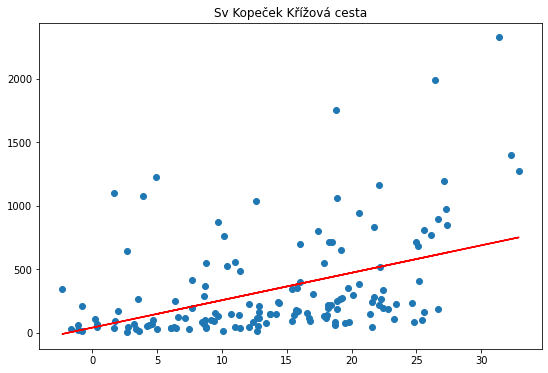

Koeficient determinace: 0.177


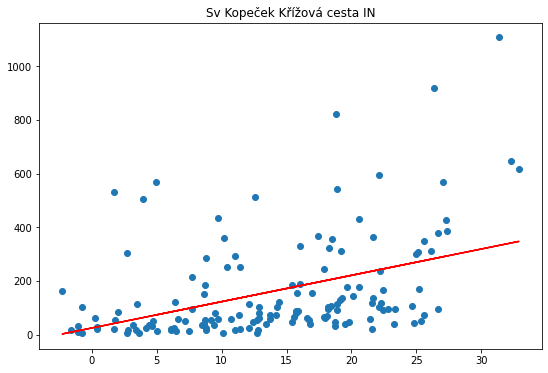

Koeficient determinace: 0.2


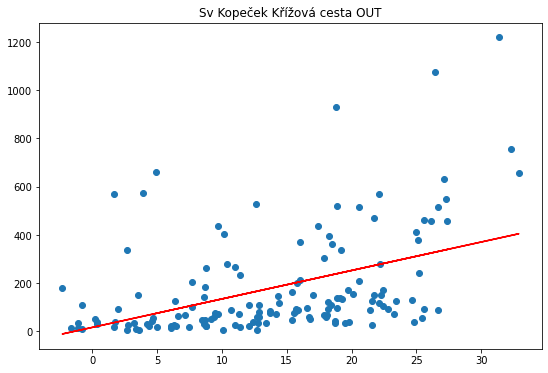

Koeficient determinace: 0.146


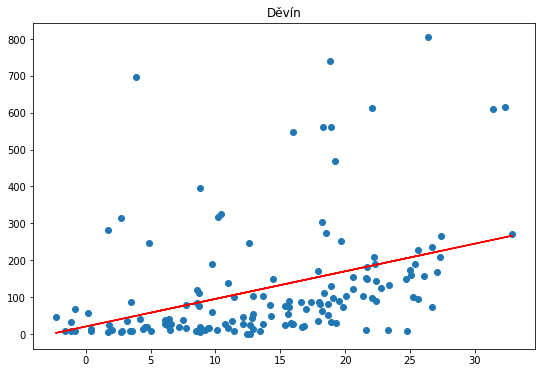

Koeficient determinace: 0.174


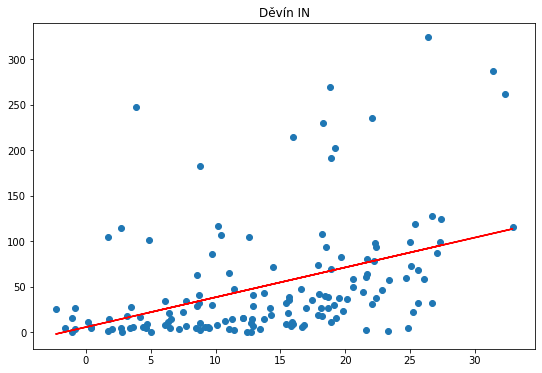

Koeficient determinace: 0.125


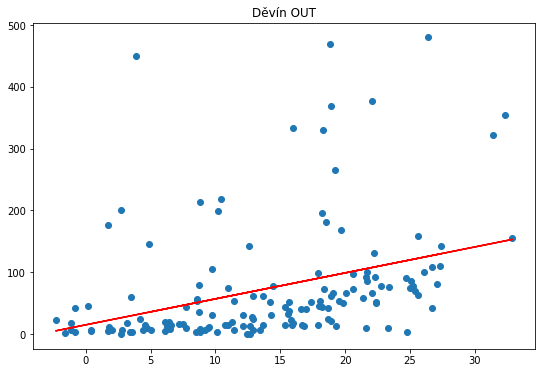

Koeficient determinace: 0.144


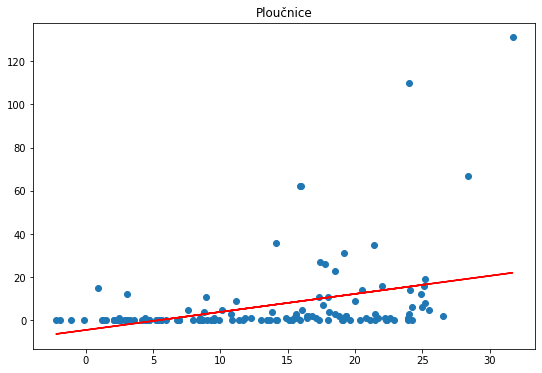

Koeficient determinace: 0.045


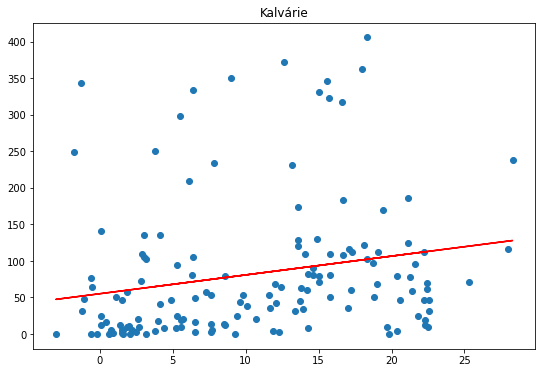

Koeficient determinace: 0.003


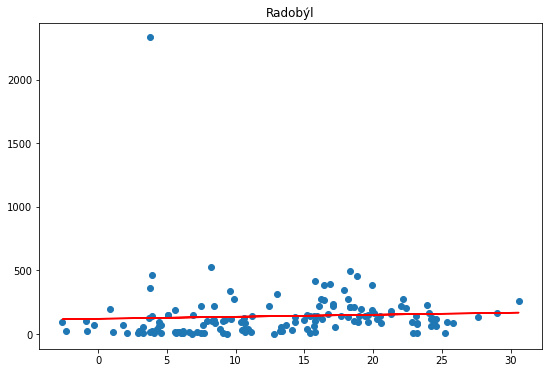

In [16]:
seznam = dataset['nazev_citace'].unique()
for nazev in seznam:
    scitac = dataset[dataset['nazev_citace']== nazev]
    scitac_2020 = scitac[scitac['datum'] >= '2020-01-01']
    y = scitac_2020.iloc[:, 3].values 
    X = scitac_2020.iloc[:, 8].values
    X = X.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    r_sq = model.score(X, y)
    print('Koeficient determinace:', round(r_sq, 3))
    y_pred = model.predict(X)
    plt.figure(figsize=(9, 6))
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.title(nazev)
    plt.show()
    
    

Koeficient determinace: 0.083


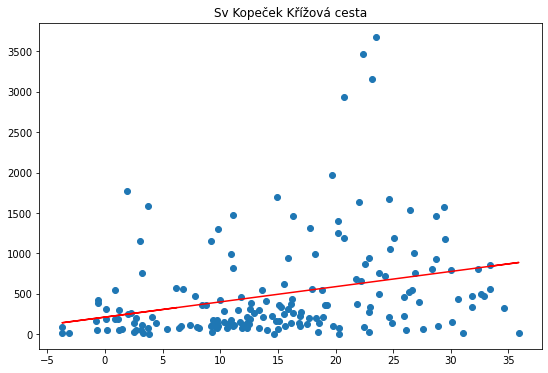

Koeficient determinace: 0.082


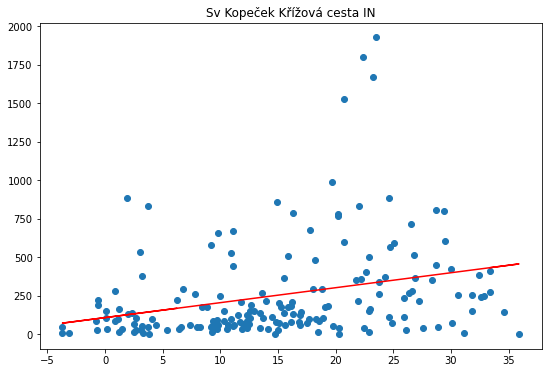

Koeficient determinace: 0.084


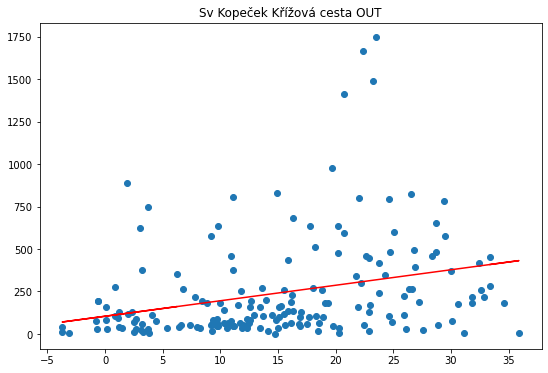

Koeficient determinace: 0.061


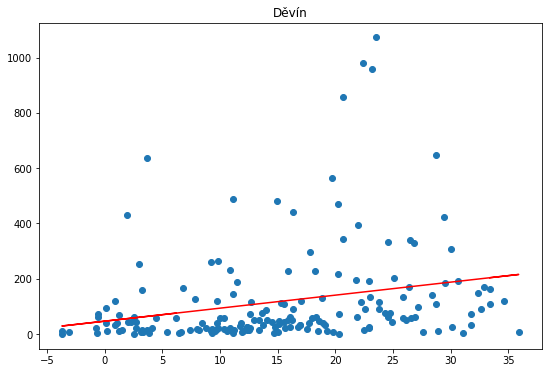

Koeficient determinace: 0.073


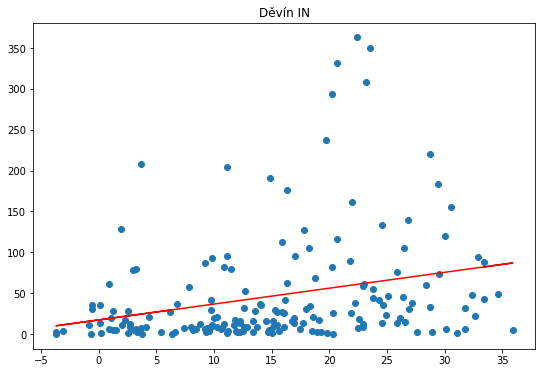

Koeficient determinace: 0.052


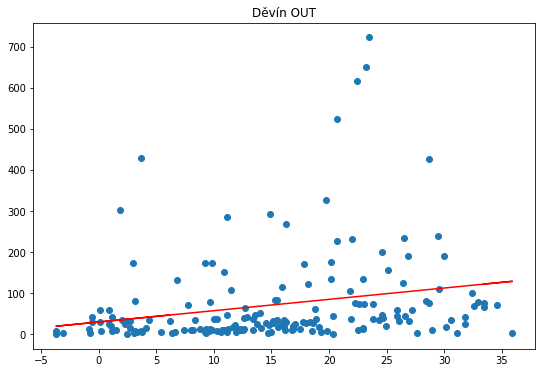

Koeficient determinace: 0.07


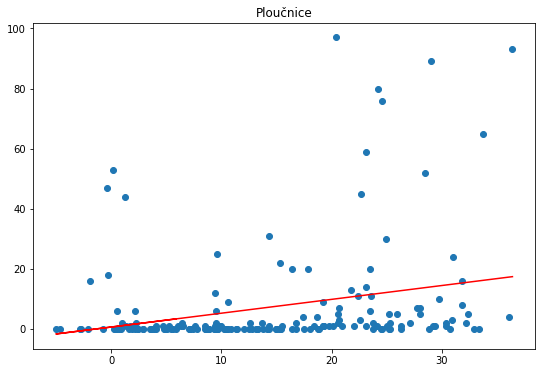

Koeficient determinace: 0.077


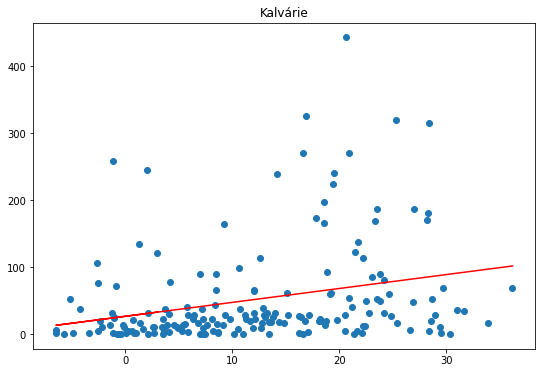

Koeficient determinace: 0.053


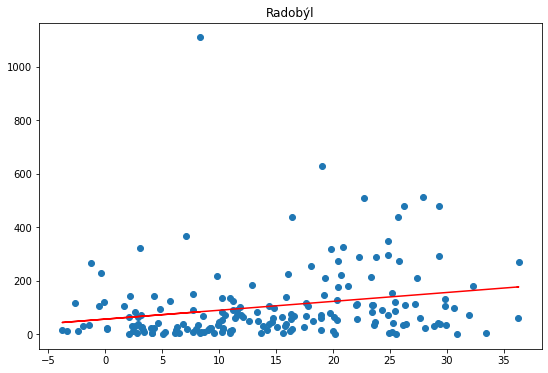

In [17]:
seznam = dataset['nazev_citace'].unique()
for nazev in seznam:
    scitac = dataset[dataset['nazev_citace']== nazev]
    scitac_2019 = scitac[(scitac['datum'] >= '2019-01-01') & (scitac['datum'] <= '2019-06-30')]
    y = scitac_2019.iloc[:, 3].values 
    X = scitac_2019.iloc[:, 8].values
    X = X.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    r_sq = model.score(X, y)
    print('Koeficient determinace:', round(r_sq, 3))
    y_pred = model.predict(X)
    plt.figure(figsize=(9, 6))
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.title(nazev)
    plt.show()